In [2]:
!pip install keras

     |████████████████████████████████| 1.7 MB 747 kB/s eta 0:00:01


In [4]:
!pip install tensorflow

     |████████████████████████████████| 241.2 MB 22 kB/s  eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     |████████████████████████████████| 1.6 MB 750 kB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 438 kB 638 kB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 13.2 MB 729 kB/s eta 0:00:01
     |████████████████████████████████| 124 kB 631 kB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 5.9 MB 638 kB/s eta 0:00:01
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-macosx_10_9_x86_64.whl (3.5 MB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23

In [25]:
pip install opencv-python

     |████████████████████████████████| 46.4 MB 636 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os 
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model 
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.image as mpimg
import cv2

In [9]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:  
  layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

2022-11-05 10:59:43.524272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile( loss='categorical_crossentropy',  
               optimizer='adam',  
               metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,                          
                                    shear_range = 0.2,
                                   zoom_range = 0.2,
                                    horizontal_flip= True)
training_set = train_datagen.flow_from_directory('/Users/souravmohile/Academics/FY PROJECT/Datasets/Bananana/Train',
                                           target_size = (224, 224),
                                             batch_size = 16,                             
                                        class_mode = 'categorical')

Found 1504 images belonging to 3 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/Users/souravmohile/Academics/FY PROJECT/Datasets/Bananana/Validation',
                                         target_size = (224, 224),
                                         batch_size=16,
                                         class_mode = 'categorical')

Found 200 images belonging to 3 classes.


In [12]:
r = model.fit(training_set,  validation_data=test_set,  epochs=25, steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/25
94/94 [==============================] - 133s 1s/step - loss: 0.2838 - accuracy: 0.9116 - val_loss: 0.8788 - val_accuracy: 0.5550
Epoch 2/25
94/94 [==============================] - 138s 1s/step - loss: 0.0605 - accuracy: 0.9801 - val_loss: 0.4993 - val_accuracy: 0.8750
Epoch 3/25
94/94 [==============================] - 188s 2s/step - loss: 0.0316 - accuracy: 0.9874 - val_loss: 0.5524 - val_accuracy: 0.8300
Epoch 4/25
94/94 [==============================] - 191s 2s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4893 - val_accuracy: 0.8550
Epoch 5/25
94/94 [==============================] - 167s 2s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.5923 - val_accuracy: 0.7700
Epoch 6/25
94/94 [==============================] - 167s 2s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.5683 - val_accuracy: 0.8150
Epoch 7/25
94/94 [==============================] - 164s 2s/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.5060 - val_accuracy: 0.8450
Epoch 8/25
94

In [15]:
model.save("ripeness.h5")

In [1]:
pip install Pillow==9.0.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install Pillow==9.2.0

  Using cached Pillow-9.2.0-cp39-cp39-macosx_10_10_x86_64.whl (3.1 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
from PIL import Image, ImageOps
from keras import premade_models
from keras.models import load_model
import numpy as np

In [10]:
def model_predict(img_path):
    np.set_printoptions(suppress=True)
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.open(img_path)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    
    model = load_model('ripeness.h5')
    
    preds = ""
    prediction = model.predict(data)
    if np.argmax(prediction)==0:
        preds = f"Overripe"
    elif np.argmax(prediction)==1:
        preds = f"Ripe"
    else :
        preds = f"Unripe"

    return preds

In [11]:
from IPython.display import Image as img123

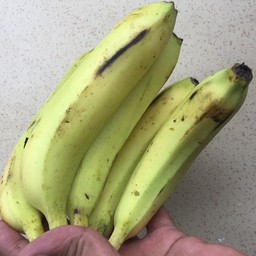

In [12]:
fruit_pic = "/Users/souravmohile/Codingwoding/jupyter_projects/FruitMaturityDetectorFYProject/Datasets/Bananana/BananaTest/unripe/IMG_8600.jpg"
img123(filename=fruit_pic) 

In [13]:
 model_predict(fruit_pic)

AttributeError: module 'PIL.Image' has no attribute 'Resampling'